# Tarea 2 - Estadística Computacional

- Nombre: Valentina Bastidas Schade

Curso: Estadística Computacional

Doctorado en Estadística


Responda las preguntas que se indican colocando el código requerido. El Notebook se entrega totalmente ejecutado.

**Ingrese los Toolbox que se utilizarán en este Jupyter**

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy import optimize



## 1. Estudio de Algoritmos de Ordenamiento

Realizar un estudio comparativo de los tiempos de ejecución requeridos por los algoritmos de ordenamientos, para ordernar listas de elementos con diferentes tamaños. El estudio debe considerar al menos 4 algoritmos de ordenamientos diferentes seleccionados por Ud.

**1.1.-** Implementar una función que genere una lista con $n$ números aleatorios en el rango $a$, $b$. Los parámetros $n, a, b$ son ingresados por el usuario.

In [ ]:
#a:lim inf    b:lim sup    n:cantidad.  d:decimales
def random(a,b,n,d):
  r=np.random.uniform(a,b,n)
  r=np.around(r,d)
  return(r)

In [ ]:
#Ejemplo
A=random(1,20,10,3)
print("El vector aleatorio es: ",A)

El vector aleatorio es:  [ 1.659  3.613  6.741 15.59  11.278  4.207 17.629  1.879 10.091 17.822]


**1.2.-** Implementar al menos 4 funciones con algoritmos de ordenamientos diferentes



---

###Algoritmo de ordenamiento 1: Selection Sort

In [ ]:
B=random(1,20,10,3)

In [ ]:
#funcion Selection Sort
def orden_sort(A):
  for i in range(len(A)):
    min_idx = i
    for j in range(i+1,len(A)):
      if A[min_idx]>A[j]:
        min_idx = j
    A[i],A[min_idx] = A[min_idx],A[i]
  return(A)

In [ ]:
obj1=orden_sort(B)
print("La lista ordenada con Selection Sort es: ", obj1)

La lista ordenada con Selection Sort es:  [ 3.681  5.084  9.67  11.61  13.109 14.55  15.399 17.379 18.1   18.94 ]




---

###Algoritmo de ordenamiento 2: Bubble Sort

In [ ]:
B=random(1,20,10,3)

In [ ]:
#bubble sort
def bubble_sort(x):
  n=len(x)
  for i in range(n-1):
    for j in range(0,n-i-1):
      if x[j]>x[j+1]:
        x[j],x[j+1]=x[j+1],x[j]
  return(x)

In [ ]:
obj2=bubble_sort(B)
print("La lista ordenada con Bubble Sort es: ", obj2)

La lista ordenada con Bubble Sort es:  [ 2.745  3.899  6.53   8.963 11.495 13.598 16.399 18.645 19.006 19.551]




---

###Algoritmo de ordenamiento 3: Merge Sort

In [ ]:
#merge sort
def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
    L = [0] * (n1)#arreglos temporales
    R = [0] * (n2)#arreglos temporales
    for i in range(0, n1):
        L[i] = arr[l + i]
    for j in range(0, n2):
        R[j] = arr[m + 1 + j]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
 
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
 

def mergeSort(arr, l, r): 
    if l < r:
      m = l+(r-l)//2
      mergeSort(arr, l, m)
      mergeSort(arr, m+1, r)
      merge(arr, l, m, r)
    return(arr)


In [ ]:
B=random(1,40,10,3)
n=len(B)
obj3=mergeSort(B,0,n-1)
print("La lista ordenada con Merge Sort es: ", obj3)

La lista ordenada con Merge Sort es:  [ 5.541 11.506 14.449 17.273 22.021 23.657 29.016 29.829 33.932 36.102]


---

###Algoritmo de ordenamiento 4: Quick Sort

In [ ]:
#quick sort
def partition(x,low,high):
  i=(low-1)
  pivot=x[high]
  for j in range(low,high):
    if x[j]<=pivot:
      i=i+1
      x[i],x[j]=x[j],x[i]
  x[i+1],x[high]=x[high],x[i+1]
  return(i+1)

def quick_sort(x,low,high):
  if len(x)==1:
    return(x)
  if low < high:
      pi=partition(x,low,high)
      quick_sort(x,low,pi-1)
      quick_sort(x,pi+1,high)
  return(x)

In [ ]:
B=random(3,30,10,3)
n = len(B)
obj4=quick_sort(B,0,(n-1))
print("La lista ordenada con Quick Sort es: ", obj4)

La lista ordenada con Quick Sort es:  [ 3.777  5.768  6.625  8.442  8.631  9.909 13.174 17.296 22.048 29.379]


**1.3.-** Calcular los tiempos de ejecución requeridos por los métodos para ordenar listas aleatorias de elementos con $n= 10, 100, 1000, 10000, 100000$ elementos.  

In [ ]:
def tiempo_orden(x,ordenamiento): #x es el arreglo a ordenar 
  if ordenamiento=="sort":
    start = time.time()
    s1=orden_sort(x)
    end = time.time()
    ts1=end - start
    print("El tiempo para ordenar una lista de largo", len(x), "por el método Sort es: ", ts1)
  elif ordenamiento=="bubble":
    start = time.time()
    b1=bubble_sort(x)
    end = time.time()
    tb1=end - start
    print("El tiempo para ordenar una lista de largo", len(x), "por el método Bubble es: ", tb1)
  elif ordenamiento=="merge":
    n=len(x)
    start = time.time()
    m1=mergeSort(x, 0, n-1)
    end = time.time()
    tm1=end - start
    print("El tiempo para ordenar una lista de largo", len(x), "por el método Merge es: ", tm1)
  elif ordenamiento=="quick":
    n=len(x)
    start = time.time()
    q1=quick_sort(x,0,(n-1))
    end = time.time()
    tq1=end - start
    print("El tiempo para ordenar una lista de largo", len(x), "por el método Quick es: ", tq1)

In [249]:
#tiempos para método sort
for i in range(1,6):
  n=10**i
  aleatorio=random(0,50,n,2)
  tiempo_orden(aleatorio,"sort")

El tiempo para ordenar una lista de largo 10 por el método Sort es:  6.556510925292969e-05
El tiempo para ordenar una lista de largo 100 por el método Sort es:  0.0023474693298339844
El tiempo para ordenar una lista de largo 1000 por el método Sort es:  0.12456631660461426
El tiempo para ordenar una lista de largo 10000 por el método Sort es:  12.429742336273193
El tiempo para ordenar una lista de largo 100000 por el método Sort es:  1249.2469544410706


In [255]:
#tiempos para método bubble
for i in range(1,6):
  n=10**i
  aleatorio=random(0,50,n,2)
  tiempo_orden(aleatorio,"bubble")

El tiempo para ordenar una lista de largo 10 por el método Bubble es:  0.00011420249938964844
El tiempo para ordenar una lista de largo 100 por el método Bubble es:  0.007313251495361328
El tiempo para ordenar una lista de largo 1000 por el método Bubble es:  0.23528409004211426
El tiempo para ordenar una lista de largo 10000 por el método Bubble es:  23.602906703948975
El tiempo para ordenar una lista de largo 100000 por el método Bubble es:  2399.188801050186


In [89]:
#tiempos para método merge
for i in range(1,6):
  n=10**i
  aleatorio=random(0,50,n,2)
  tiempo_orden(aleatorio,"merge")

El tiempo para ordenar una lista de largo 10 por el método Merge es:  0.00010132789611816406
El tiempo para ordenar una lista de largo 100 por el método Merge es:  0.0005500316619873047
El tiempo para ordenar una lista de largo 1000 por el método Merge es:  0.01933431625366211
El tiempo para ordenar una lista de largo 10000 por el método Merge es:  0.09073138236999512
El tiempo para ordenar una lista de largo 100000 por el método Merge es:  1.0930590629577637


In [88]:
#tiempos para método quick
for i in range(1,6):
  n=10**i
  aleatorio=random(0,50,n,2)
  tiempo_orden(aleatorio,"quick")

El tiempo para ordenar una lista de largo 10 por el método Quick es:  2.9087066650390625e-05
El tiempo para ordenar una lista de largo 100 por el método Quick es:  0.0003972053527832031
El tiempo para ordenar una lista de largo 1000 por el método Quick es:  0.012553215026855469
El tiempo para ordenar una lista de largo 10000 por el método Quick es:  0.07323169708251953
El tiempo para ordenar una lista de largo 100000 por el método Quick es:  1.3392624855041504


**1.4.-** Colocar una tabla comparativa con los resultados, además de un gráfico de $n$ vs $tiempo$.

| n      | Sort | Bubble | Merge | Quick|
|-|||||
| 10|6.556510925292969e-05 |0.00011420249938964844| 0.00010132789611816406|2.9087066650390625e-05|
| 100|0.0023474693298339844|0.007313251495361328|0.0005500316619873047|0.0003972053527832031|
| 1000|0.12456631660461426|0.23528409004211426|0.01933431625366211|0.012553215026855469|
| 10000|12.429742336273193|23.602906703948975|0.09073138236999512|0.07323169708251953|
| 100000|1249.2469544410706|2399.188801050186|1.0930590629577637|1.3392624855041504|


In [257]:
n=[10,100,1000,10000,100000]
ts=[6.556510925292969e-05,0.0023474693298339844,0.12456631660461426,12.429742336273193,1249.2469544410706]
tb=[0.00011420249938964844,0.007313251495361328,0.23528409004211426,23.602906703948975,2399.188801050186]
tm=[0.00010132789611816406,0.0005500316619873047,0.01933431625366211,0.09073138236999512,1.0930590629577637]
tq=[2.9087066650390625e-05,0.0003972053527832031,0.012553215026855469,0.07323169708251953,1.3392624855041504]

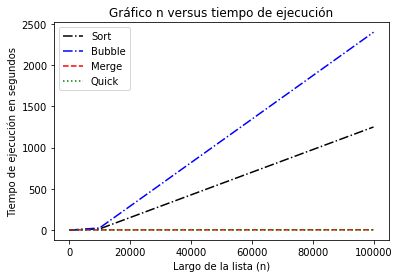

In [258]:
# Gráfico
plt.plot(n, ts, "-.", color='black', label="Sort")
plt.plot(n, tb,"-.", color='blue', label="Bubble")
plt.plot(n, tm,"--", color='red', label="Merge")
plt.plot(n, tq,":", color='green',label="Quick")
plt.title("Gráfico n versus tiempo de ejecución")
plt.xlabel("Largo de la lista (n)")
plt.ylabel("Tiempo de ejecución en segundos")
plt.legend()
plt.show()

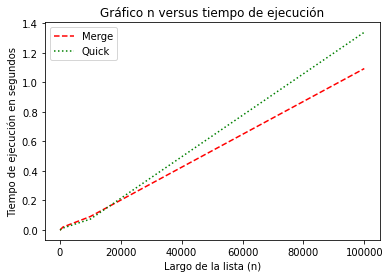

In [260]:
# Gráfico dos más rápidos
plt.plot(n, tm,"--", color='red', label="Merge")
plt.plot(n, tq,":", color='green',label="Quick")
plt.title("Gráfico n versus tiempo de ejecución")
plt.xlabel("Largo de la lista (n)")
plt.ylabel("Tiempo de ejecución en segundos")
plt.legend()
plt.show()

**Concluir:** El método más lento es Bubble. Los ordenamientos Merge y Quick son considerablemente más rápidos que los dos primeros, más precisamente, el método Merge es más rápido al procesar los 100.000 datos.

## 2. Métodos Numéricos

**2.1.** Implementar el método de Halley cuya ecuación de iteración está dada por:

$$g(x) = x - \frac{f(x)}{f'(x)}\left(1 - \frac{f(x)\cdot f''(x)}{2(f'(x))^2} \right)^{-1}$$

Una vez implementada la función, aplicarla para resolver la ecuación:

$$f(x) = x^3 -3x + 2$$

con punto de partida $x_0=2.4$.

O equivalentemente:
$$x_{i+1} = x_i - \frac{2f(x_i)f'(x_i)}{2(f'(x_i))^2-f(x_i)f''(x_i)}$$

In [ ]:
def halley(x0,tolerancia,f,df,ddf):
  x=2.4
  tolerancia=10**-20
  while abs(f(x))>tolerancia:
    res=x-(2*f(x)*df(x))/((2*df(x)**2)-f(x)*ddf(x))
    print(res)
    x=res
  print("La raíz encontrada es",round(x,5), "y su imagen es ", f(x))

In [ ]:
def h(x):
  return(x**3-3*x+2)

def dh(x):
  return(3*x**2-3)

def ddh(x):
  return(6*x)

halley(2.4,10**-4,h,dh,ddh)

1.5316749585406304
1.1876690331100084
1.0638752411803718
1.0214437443464313
1.0071649837852699
1.0023902307810804
1.0007969552496045
1.0002656752756045
1.0000885610394379
1.000029520637295
1.0000098402449236
1.0000032800760248
1.0000010933485601
1.0000003644474273
1.0000001213977296
1.0000000405277747
1.000000012180631
1.0000000087095096
1.0000000030895224
La raíz encontrada es 1.0 y su imagen es  0.0


In [ ]:
#otro ejemplo
def g(x):
  return(x**2+2*x-15)

def dg(x):
  return(2*x+2)

def ddg(x):
  return(2)

halley(0.5,10**-10,g,dg,ddg)

2.995737963693765
2.999999998788382
3.0
La raíz encontrada es 3.0 y su imagen es  0.0


**2.2** El proceso de aceleración de Aitken se utiliza para acelerar el proceso de convergencia de los algoritmos con convergencia lineal.

Dada una secuencia $\{x_n\}_{n=0}^{\infty}$ que converge linealmente a $p$, entonces el proceso de Aitken está dada por:

$$q_n = x_n - \frac{(x_{n+1}-x_n)^2}{x_{n+2} - 2x_{n+1} + x_n}$$.

**Problema:** La secuencencia $\{x_n\}$ generada por la iteración de punto fijo $g(x) = \ln(x) + 2$ y partiendo desde $x_0=3.14$ converge linealmente a $p\approx 3.1419322$. Apicar el método de Aitken para encontrar $q_1$, $q_2$ y $q_3$ y de esta forma acelerar la convergencia. (Obs: $p\approx 3.14619321$)

In [242]:
x=3.14
xn=[]
for i in range(5):
  x=np.log(x)+2
  xn.append(x)
print(xn)

[3.144222799920162, 3.145566737170702, 3.1459940765158634, 3.146129921772223, 3.146173101231629]


In [247]:
qn=[]
for i in range(3):
  qn.append(xn[i]-(xn[i+1]-xn[i])**2/(xn[i+2]-2*xn[i+1]+xn[i]))
print(qn)
print("La sucesión converge a" , qn[2])

[3.1461933120965377, 3.146193229861081, 3.1461932215540767]
La sucesión converge a 3.1461932215540767


#3.- Problema de Aplicación:

Un problema clásico de la física elemental es el lanzamiento de un proyectil. Suponiendo que se dispara un proyectil desde el origen con un ángulo $\alpha$ y velocidad inicial $v_0$. La ecuación de movimiento horizontal y vertical de la trayectoria del proyectil, al considerar una resistencia del aire proporcional a la velocidad, viene determinado por el siguiente modelo:

$$
  \begin{array}{cl}
 y(t) &= (Cv_y+9.8C^2)\left(1-e^{-t/C}\right)-9.8Ct\\
 x(t) &= Cv_x\left(1-e^{-t/C}\right)
 \end{array}
$$

donde $C=m/\kappa$, $\kappa$ es el coeficiente de resitencia del aire y $m$ es la masa del proyectil. Además $v_x=v_0 \cos(\alpha)$ y $v_y=v_0 \sin(\alpha)$.

Se dispara el proyectil con un ángulo de elevación de $60°$, velocidades iniciales $v_0=100 [m/s]$ y $C=10$. Determinar el tiempo transcurrido hasta el impacto en el suelo y el alcance del lanzamiento. 

- 3.1. Graficar la trayectoria del proyectil

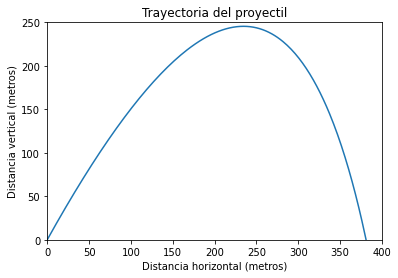

In [121]:
#gráfico distancia vertical vs distancia horizontal
alfa=math.pi/3
v0=100
C=10
vx=v0*math.cos(alfa)
vy=v0*math.sin(alfa)
tiempo=np.linspace(0, 15, 200)

xt=[]
for i in range(len(tiempo)):
  xt.append(C*vx*(1-math.exp(-tiempo[i]/C)))
#print(xt)

yt=[]
for i in range(len(tiempo)):
  yt.append((C*vy+9.8*C**2)*(1-math.exp(-tiempo[i]/C))-9.8*C*tiempo[i])
#print(yt)

#plt.plot(tiempo,yt)
plt.plot(xt,yt)
plt.xlim(0, 400)
plt.ylim(0, 250)
plt.title("Trayectoria del proyectil")
plt.xlabel("Distancia horizontal (metros)")                      
plt.ylabel("Distancia vertical (metros)")    
plt.show()  

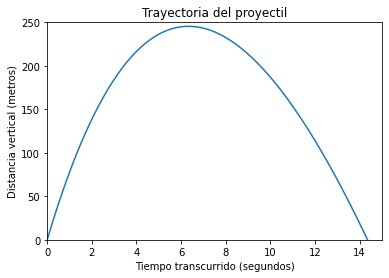

In [120]:
#otro gráfico: distancia vertical vs tiempo
plt.plot(tiempo,yt)
plt.xlim(0, 15)
plt.ylim(0, 250)
plt.title("Trayectoria del proyectil")
plt.xlabel("Tiempo transcurrido (segundos)")                      
plt.ylabel("Distancia vertical (metros)")  
plt.show()

- 3.2. Utilizar un método numérico (toolbox) con punto inicial $p_0=14$ y obtener una solución.
Indicar cuántos dígitos significativos tiene la solución.

In [137]:
def f(t):
  alfa=math.pi/3
  v0=100
  C=10
  vx=v0*math.cos(alfa)
  vy=v0*math.sin(alfa)
  return ((C*vy+9.8*C**2)*(1-math.exp(-t/C))-9.8*C*t)

In [207]:
#toolbox 1: método Broyden2
solucion = optimize.root(f,14,method='broyden2')
sol=solucion.x
sol
print("El proyectil toca el suelo a", sol, "segundos desde que fue lanzado")

El proyectil toca el suelo a 14.35293048428746 segundos desde que fue lanzado


In [208]:
#dígitos significativos
t = 8
epsilon = 10**(1-t)/2
# Test del signo
print(f(sol-epsilon)*f(sol+epsilon))
print("Con el método de Broyden la solución", sol, "tiene", t,"dígitos significativos")

-6.546377212022536e-12
Con el método de Broyden la solución 14.35293048428746 tiene 8 dígitos significativos


In [209]:
#toolbox 2: método de bisección
root = optimize.bisect(f, 14, 20)
root
print("El proyectil toca el suelo a", root, "segundos desde que fue lanzado")

El proyectil toca el suelo a 14.352930500401726 segundos desde que fue lanzado


In [210]:
#dígitos significativos
t = 13
epsilon = 10**(1-t)/2
# Test del signo
print(f(root-epsilon)*f(root+epsilon))
print("Con el método de bisección la solución", root, "tiene", t, "dígitos significativos")

-4.904147056673763e-22
Con el método de bisección la solución 14.352930500401726 tiene 13 dígitos significativos


- 3.3 Aplicar el método de Newton y obtener una solución. Indicar cuántos dígitos significativos tiene la solución.

In [211]:
#newton
def df(t):
  alfa=math.pi/3
  v0=100
  C=10
  vx=v0*math.cos(alfa)
  vy=v0*math.sin(alfa)
  return ((C*vy+9.8*C**2)*(math.exp(-t/C)/C)-9.8*C)

x0 = 14
maxit = 15
for i in range (maxit):
  xn= x0-f(x0)/df(x0)
  x0= xn
x0

14.352930500402005

In [213]:
#dígitos significativos
t = 15
epsilon = 10**(1-t)/2
# Test del signo
f(x0-epsilon)*f(x0+epsilon)
print("Con el método de newton la solución", x0, "tiene", t, "dígitos significativos")

Con el método de newton la solución 14.352930500402005 tiene 15 dígitos significativos
